1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

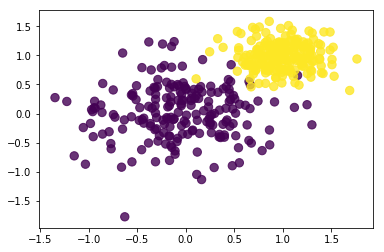

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

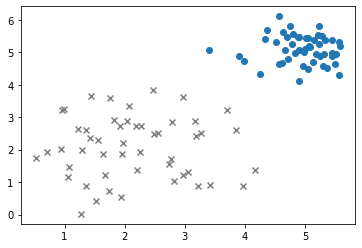

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Generating some random data
#random.normal(loc=0.0, scale=1.0, size=None)
#locfloat or array_like of floats = Mean (“centre”) of the distribution, scalefloat or array_like of floats = Standard deviation (spread or “width”) of the distribution. Must be non-negative.
#sizeint or tuple of ints, optional = Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.
randomize = np.random.normal(loc=0.0, scale=1.0, size=100)

#Plotting the scatter
def gaussian(mean1, mean2, std_dev1, std_dev2, size):
    x1 = np.random.normal(loc=mean1, scale=std_dev1, size=size)
    y1 = np.random.normal(loc=mean1, scale=std_dev1, size=size)
    x2 = np.random.normal(loc=mean2, scale=std_dev2, size=size)
    y2 = np.random.normal(loc=mean2, scale=std_dev2, size=size)
    return ((x1, y1),(x2, y2))

dataset = gaussian(5, 2, 0.5, 1, 50)

#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
plt.scatter(dataset[0][0], dataset[0][1], marker='o', c='#1f77b4');
plt.scatter(dataset[1][0], dataset[1][1], marker='x', c='#7f7f7f');
plt.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

From Pickle: 
 {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}

The data has 2 features which are residuals and distances.

In DataFrame: 
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]

Sample with residuals less than 2: 
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        

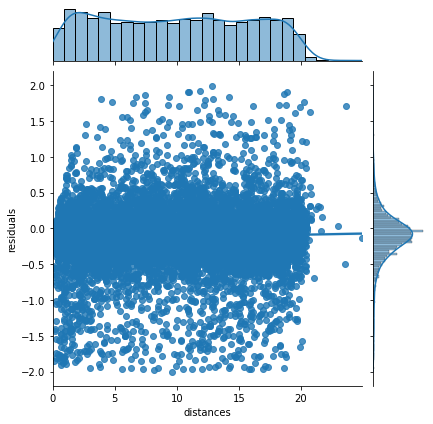

In [3]:
import pandas as pd
# filename = 'residuals_261.pkl'
# dataset = pd.Dataframe(filename)

data = pd.read_pickle('residuals_261.pkl')
print("From Pickle: \n", data) #it's in ndarray
print("\nThe data has 2 features which are residuals and distances.")

#change to dictionary
data_dict = data[()]

#converting to dataframe
data_frame = pd.DataFrame(data_dict)
print("\nIn DataFrame: \n", data_frame)

#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
clean = data_frame[data_frame['residuals'].abs() < 2]
print("\nSample with residuals less than 2: \n", clean)

#Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
import seaborn as sns

sns.jointplot(x="distances", y="residuals", data=clean, kind="reg");

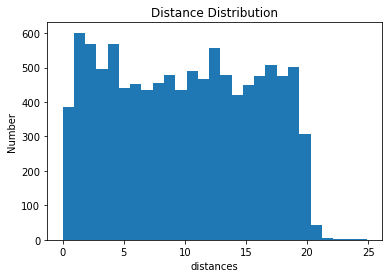

In [4]:
#Create manually (without using seaborn) the profile histogram for the "distance" variable
list_distance = list(clean['distances']) #creating the list of distances data

histogram, bins,_  = plt.hist(list_distance, bins='auto')
plt.xlabel('distances')
plt.ylabel('Number')
plt.title('Distance Distribution')
plt.show()

In [5]:
#Obtain numpy array
#x, the array of bin centers of the profile histogram of the "distance" variable
print("Value of bins: \n", bins) #to know the value where each bin ends
range_bins = list(zip(bins,bins[1:])) #making a new list for all of the values where each bin starts and ends
print("\nRange of bins: \n", range_bins)

#Calculating centers of bins (x)
#for example, we calculate the first 2 values {0.922 - (0.922 - 0.00)/2} = 0.46..., it will be implemented for every bin
centers_bins = [x[1]-(x[1]-x[0])/2 for x in range_bins]
print("\nCenter of bins: \n",centers_bins)

#Calculating mean values of the "residuals", estimated in slices (bins) of "distance"
y = clean.groupby(pd.cut(clean['distances'], bins=bins)).mean()['residuals']
print("\nMean values of residuals with bins of distance: \n", y)

#err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
err_y = clean.groupby(pd.cut(clean['distances'], bins=bins)).std()['residuals']
print("\nStandard deviation of residuals with bins of the distance: \n", err_y)

Value of bins: 
 [ 0.          0.92222222  1.84444444  2.76666667  3.68888889  4.61111111
  5.53333333  6.45555556  7.37777778  8.3         9.22222222 10.14444444
 11.06666667 11.98888889 12.91111111 13.83333333 14.75555556 15.67777778
 16.6        17.52222222 18.44444444 19.36666667 20.28888889 21.21111111
 22.13333333 23.05555556 23.97777778 24.9       ]

Range of bins: 
 [(0.0, 0.9222222222222214), (0.9222222222222214, 1.8444444444444428), (1.8444444444444428, 2.766666666666664), (2.766666666666664, 3.6888888888888856), (3.6888888888888856, 4.611111111111107), (4.611111111111107, 5.533333333333328), (5.533333333333328, 6.4555555555555495), (6.4555555555555495, 7.377777777777771), (7.377777777777771, 8.299999999999992), (8.299999999999992, 9.222222222222214), (9.222222222222214, 10.144444444444435), (10.144444444444435, 11.066666666666656), (11.066666666666656, 11.988888888888878), (11.988888888888878, 12.911111111111099), (12.911111111111099, 13.833333333333321), (13.833333333333321

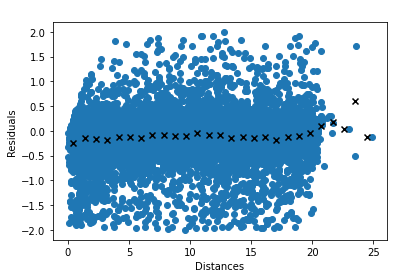

In [6]:
#Plot the profile plot on top of the scatter plot

plt.scatter(clean['distances'], clean['residuals'], marker='o', c='#1f77b4');
plt.scatter(centers_bins, y, marker='x', c='black');
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title(' ')
plt.show()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


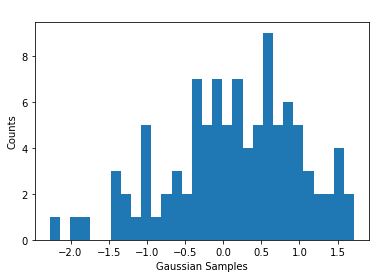

In [7]:
#Random value with mean and standard deviation
data_random = np.random.normal(loc=0.0, scale=1.0, size=100)

#Plotting histogram
histogramx, bins,_  = plt.hist(data_random, bins=30)
plt.xlabel('Gaussian Samples')
plt.ylabel('Counts')
plt.title(' ')
plt.show()

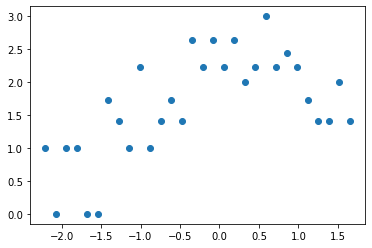

In [8]:
#Plotting poisson uncertainty
range_binsx = list(zip(bins,bins[1:]))
centers_binsx = [x[1]-(x[1]-x[0])/2 for x in range_binsx]
plt.scatter(centers_binsx, np.sqrt(histogramx), marker='o', c='#1f77b4');
plt.show()

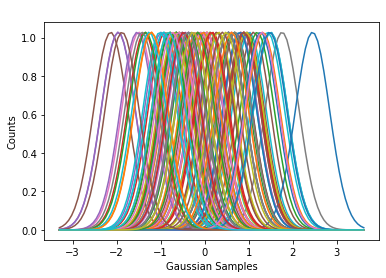

In [9]:
from scipy.stats import norm

x = np.random.normal(loc=0.0, scale=1.0, size=100)
mean = x
std_dev=1.06*np.std(x)*len(x)**(-1/5)
x_points = np.linspace(np.min(mean) - 3*std_dev, np.max(mean) + 3*std_dev, 100)
y_points= np.array([norm.pdf(x_points, mean[i], std_dev) for i in range(len(x)) ])
for i in y_points: plt.plot(x_points, i)
plt.xlabel('Gaussian Samples')
plt.ylabel('Counts')
plt.title(' ')
plt.show()
        

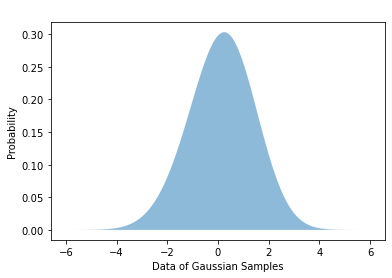

In [15]:
intervalx = np.linspace(-6, 6, 100)
gaussians = [norm(xi).pdf(intervalx) for xi in data_random]
total_gaussians = sum(gaussians)
density = total_gaussians / np.trapz(total_gaussians, intervalx)

plt.fill_between(intervalx, density, alpha=0.5)
#plt.hist(data_random, bins=50)
plt.xlabel('Data of Gaussian Samples')
plt.ylabel('Probability')
plt.title(' ')
plt.show()